# Capstone UAS Bengkod DS06

*   Nama : Muhammad Arif Aldafa
*   NIM  : A11.2022.14221

# 1. Exploratory Data Analysis (EDA)

In [19]:
#load gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/ObesityDataSet.csv"

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [21]:
#membaca dataset
df = pd.read_csv(file_path, na_values='?', skipinitialspace=True)

In [22]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [24]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [25]:
#  Cek missing values
print("Missing value sebelum dibersihkan")
df.isnull().sum()

Missing value sebelum dibersihkan


,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [26]:
#cek nilai unik per kolom
print(df.nunique())

Age                               1393
Gender                               2
Height                            1561
Weight                            1517
CALC                                 4
FAVC                                 2
FCVC                               807
NCP                                636
SCC                                  2
SMOKE                                2
CH2O                              1262
family_history_with_overweight       2
FAF                               1185
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [27]:
#cek data duplikat
print(df.duplicated().sum())

18


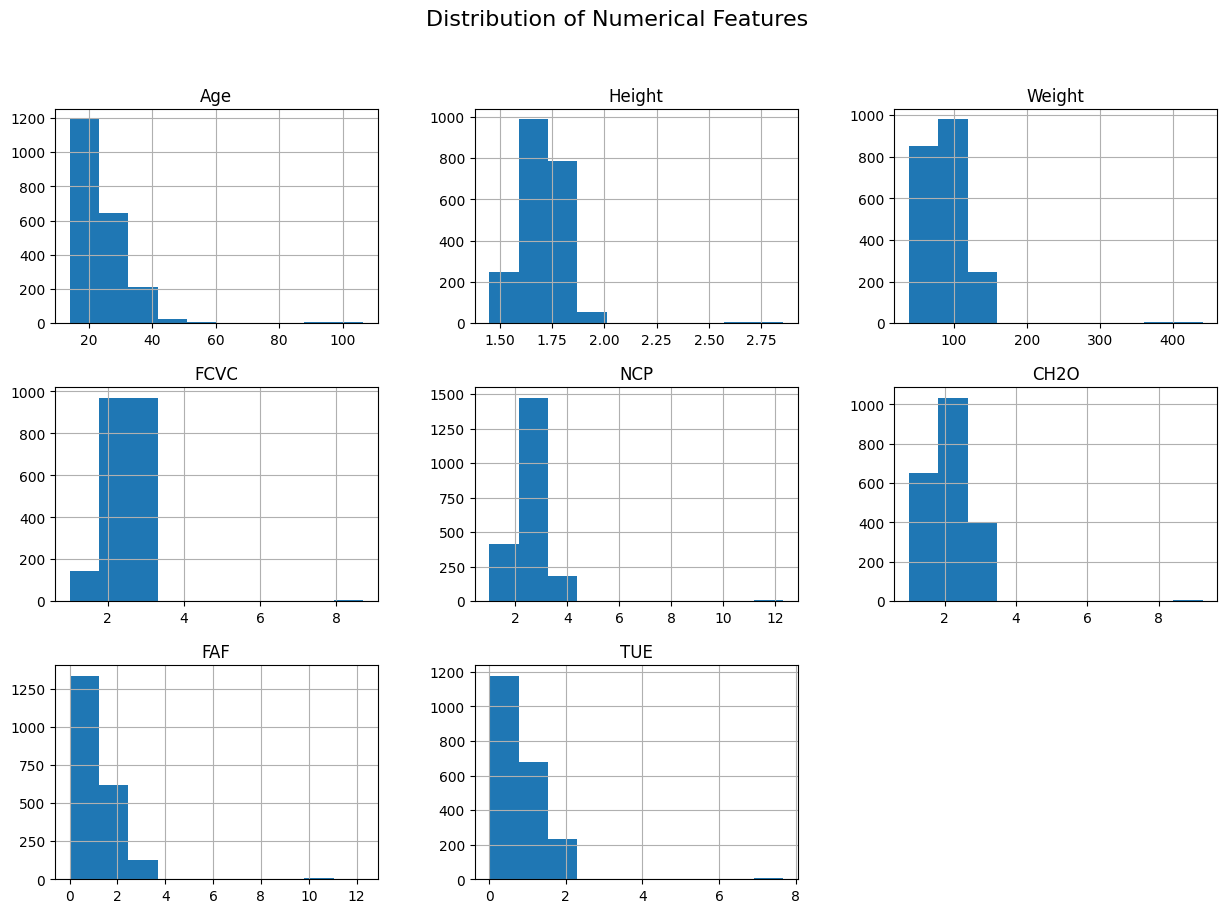

In [28]:
# Visualisasi data numerik dengan histogram
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

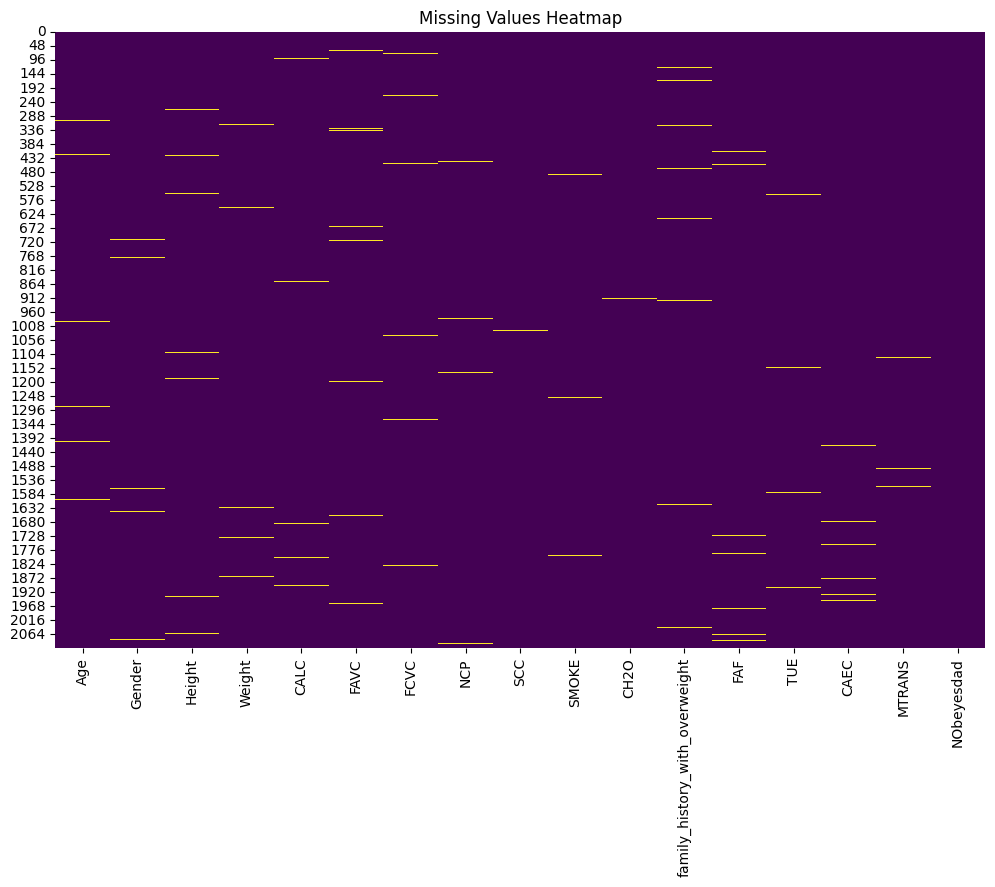

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

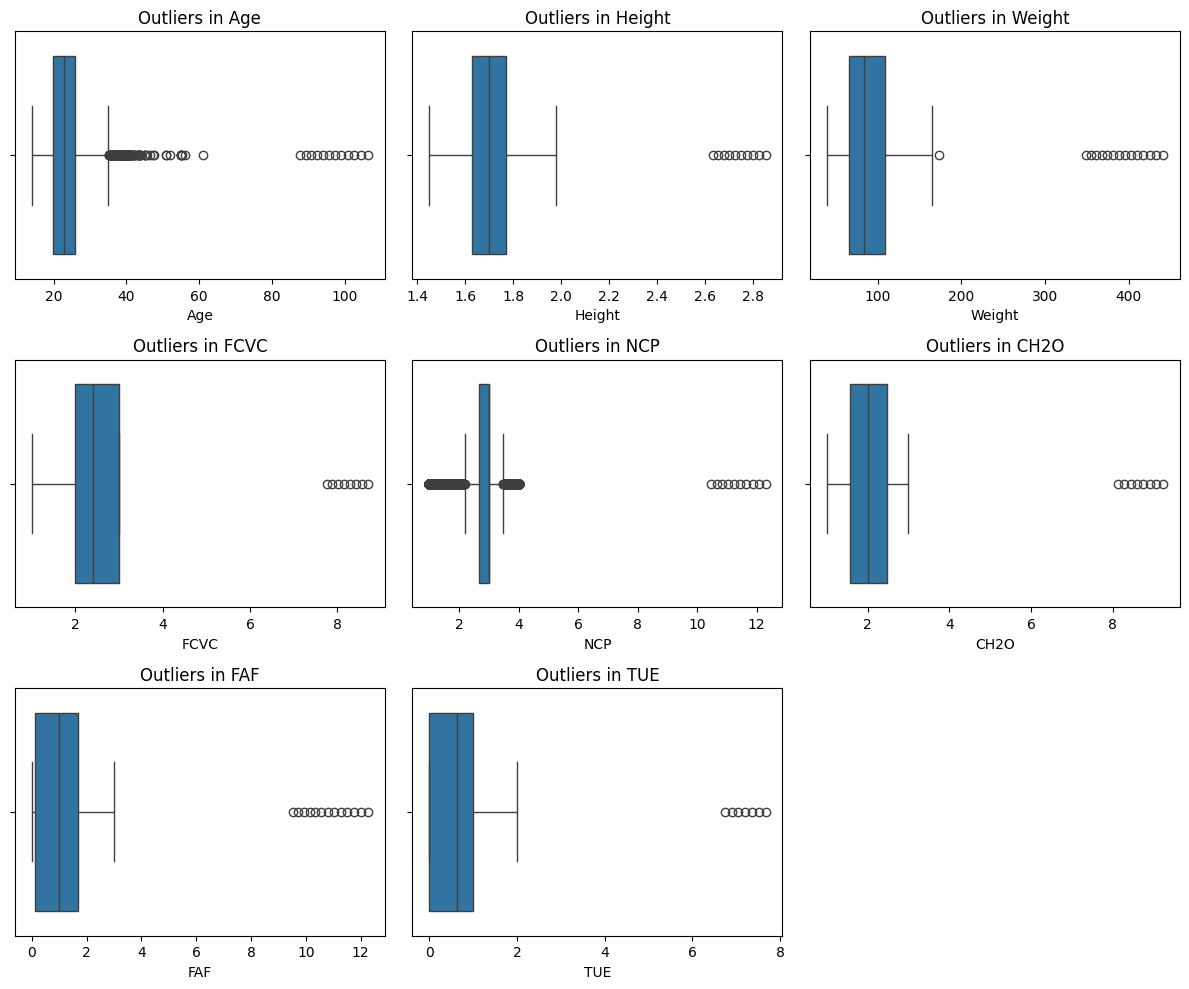

In [30]:
# 9. Visualisasi outliers dengan boxplot
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Kesimpulan


1.   Dataset: Dataset ini berisi 2111 entri dan 17 kolom dengan berbagai tipe data, termasuk numerik (kontinu dan integer) dan kategorikal (string).

2.   Missing Values: Beberapa kolom memiliki missing values, terutama di kolom-kolom seperti Age, Gender, Height, Weight, dan lainnya. Missing values di kolom kategorikal diisi dengan modus, sementara pada kolom numerik diisi dengan median.


3.   Distribusi Data: Kolom numerik seperti Age, Height, dan Weight menunjukkan distribusi yang bervariasi. Beberapa fitur cenderung lebih terkonsentrasi, sementara lainnya memiliki sebaran yang lebih luas.
4.   Outlier: Beberapa kolom numerik menunjukkan adanya outliers yang terdeteksi melalui visualisasi boxplot.





# PreProcessing

In [31]:
#Mengisi nilai yang hilang pada kolom kategori dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Mengisi nilai yang hilang pada kolom numerik dengan median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-31-561858209>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-31-561858209>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [32]:
print("\nMissing values setelah dibersihan:")
print(df.isnull().sum())


Missing values setelah dibersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [33]:
# menghapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2091


In [34]:
#mengubah data kategorikal ke numerik dengan labelencoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
#menangani imbalance class dengan SMOTE
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target variable

In [36]:
#Menggunakan SMOTE untuk menyeimbangkan class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menormalisasi data dengan standarscaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Mengubah fitur resampled
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

df_resampled = pd.concat([X_resampled_df, y_resampled], axis=1)

# Menampilkan baris
print("Processed Data:")
print(df_resampled.head())

Processed Data:
        Age    Gender    Height    Weight      CALC      FAVC      FCVC  \
0 -0.437567 -1.008584 -0.735481 -0.654161  1.435982 -2.584207 -0.706158   
1 -0.437567 -1.008584 -1.565173 -0.878360 -0.492000 -2.584207  0.901437   
2 -0.198135  0.991489  0.757964 -0.289836 -2.419983 -2.584207 -0.706158   
3  0.280729  0.991489  0.757964 -0.009587 -2.419983 -2.584207  0.901437   
4 -0.317851  0.991489  0.592026  0.068883 -0.492000 -2.584207 -0.706158   

        NCP       SCC     SMOKE      CH2O  family_history_with_overweight  \
0  0.254958 -0.212337 -0.139650 -0.025344                        0.492101   
1  0.254958  4.709485  7.160768  1.363770                        0.492101   
2  0.254958 -0.212337 -0.139650 -0.025344                        0.492101   
3  0.254958 -0.212337 -0.139650 -0.025344                       -2.032101   
4 -1.804132 -0.212337 -0.139650 -0.025344                       -2.032101   

        FAF       TUE      CAEC    MTRANS  NObeyesdad  
0 -0.972454  0

# Kesimpulan

1.   Handling Missing Values: Missing values ditangani dengan menggantinya dengan nilai yang sesuai (modus untuk kolom kategorikal dan median untuk kolom numerik).

2.   Pengubahan Data Kategorikal Menjadi Numerik: Semua kolom kategorikal berhasil diubah menjadi numerik menggunakan LabelEncoder. Ini memungkinkan data untuk digunakan dalam algoritma pembelajaran mesin yang memerlukan input numerik.

3.   Ketidakseimbangan Kelas: Ketidakseimbangan kelas pada target variabel NObeyesdad diatasi dengan menggunakan teknik SMOTE, yang menambah data pada kelas minoritas untuk mencapai keseimbangan.
4.   Normalisasi Data: Semua fitur numerik telah dinormalisasi menggunakan StandardScaler untuk memastikan bahwa setiap fitur memiliki skala yang seragam dan mencegah fitur dengan rentang lebih besar mendominasi model.





# Pemodelan dan Evaluasi

In [37]:
#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [38]:
#klasifikasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


Logistic Regression Performance:
Accuracy: 0.7459349593495935
Precision: 0.7392122765741836
Recall: 0.7459349593495935
F1-Score: 0.7368639142386856


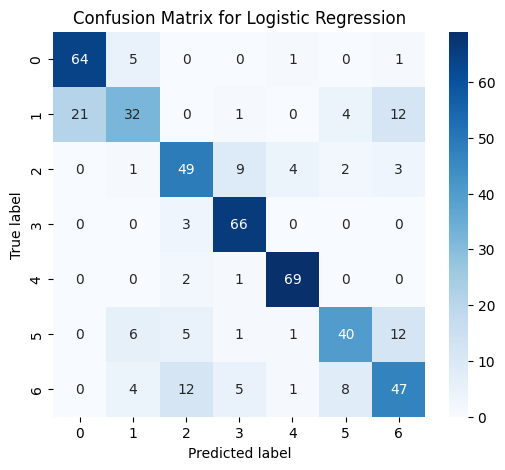

In [39]:
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = logreg.score(X_test, y_test)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# Display the performance
print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {report_logreg['weighted avg']['precision']}")
print(f"Recall: {report_logreg['weighted avg']['recall']}")
print(f"F1-Score: {report_logreg['weighted avg']['f1-score']}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Random Forest Performance:
Accuracy: 0.9308943089430894
Precision: 0.9334576790190872
Recall: 0.9308943089430894
F1-Score: 0.9309772701572462


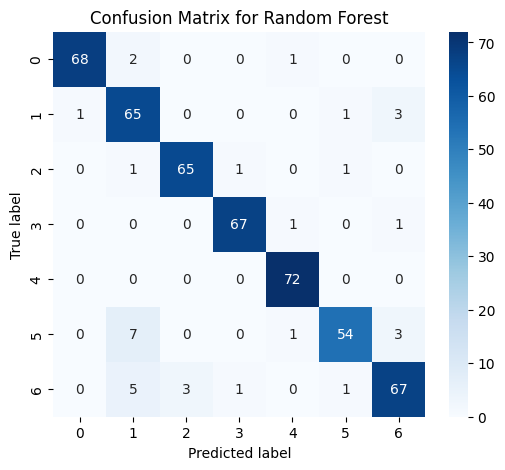

In [40]:
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = rf.score(X_test, y_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Display the performance
print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {report_rf['weighted avg']['precision']}")
print(f"Recall: {report_rf['weighted avg']['recall']}")
print(f"F1-Score: {report_rf['weighted avg']['f1-score']}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix for Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

SVM Performance:
Accuracy: 0.8170731707317073
Precision: 0.8206626354369347
Recall: 0.8170731707317073
F1-Score: 0.8175307325241684


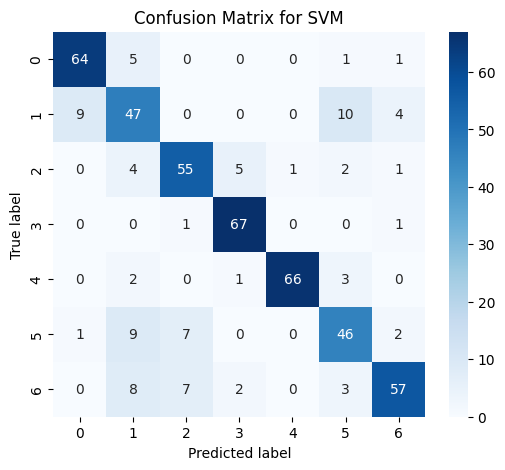

In [41]:
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = svm.score(X_test, y_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Display the performance
print(f"SVM Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {report_svm['weighted avg']['precision']}")
print(f"Recall: {report_svm['weighted avg']['recall']}")
print(f"F1-Score: {report_svm['weighted avg']['f1-score']}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("Confusion Matrix for SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Comparison of Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.745935   0.739212  0.745935  0.736864
1        Random Forest  0.930894   0.933458  0.930894  0.930977
2                  SVM  0.817073   0.820663  0.817073  0.817531


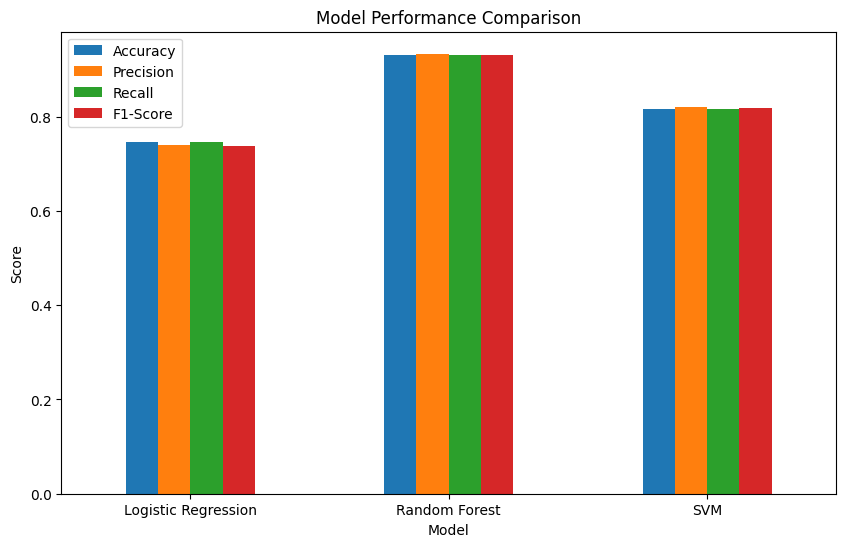

In [42]:
# Komparasi performa antar model
import pandas as pd

# Hasil evaluasi untuk masing-masing model
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [accuracy_logreg, accuracy_rf, accuracy_svm],
    "Precision": [report_logreg['weighted avg']['precision'],
                  report_rf['weighted avg']['precision'],
                  report_svm['weighted avg']['precision']],
    "Recall": [report_logreg['weighted avg']['recall'],
               report_rf['weighted avg']['recall'],
               report_svm['weighted avg']['recall']],
    "F1-Score": [report_logreg['weighted avg']['f1-score'],
                 report_rf['weighted avg']['f1-score'],
                 report_svm['weighted avg']['f1-score']]
}

# Membuat DataFrame untuk komparasi
comparison_df = pd.DataFrame(model_results)

# Menampilkan komparasi performa antar model
print("Comparison of Model Performance:")
print(comparison_df)

# Visualisasi komparasi performa antar model
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

# Kesimpulan


1.   Menggunakan 3 Model yaitu Random forest,logistic regression,SVM
2.   Kinerja random forest dalam akurasi,precision,recall, dan f1 score lebih baik dari logistic regression dan SVM



# HyperParameter

In [43]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l2'],
    'max_iter': [1000, 2000]
}

# Initialize GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg,
                                  cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [44]:
# Display the best parameters and score
print(f"Best Hyperparameters for Logistic Regression: {best_params_logreg}")
print(f"Best Cross-validation Accuracy: {best_score_logreg}")

# Train the model with the best parameters
best_logreg = grid_search_logreg.best_estimator_

# Make predictions on the test set
y_pred_best_logreg = best_logreg.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy_best_logreg = best_logreg.score(X_test, y_test)
report_best_logreg = classification_report(y_test, y_pred_best_logreg, output_dict=True)

# Display the performance of the tuned model
print(f"\nPerformance of Logistic Regression after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_logreg}")
print(f"Precision: {report_best_logreg['weighted avg']['precision']}")
print(f"Recall: {report_best_logreg['weighted avg']['recall']}")
print(f"F1-Score: {report_best_logreg['weighted avg']['f1-score']}")

Best Hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-validation Accuracy: 0.7536895674300255

Performance of Logistic Regression after Hyperparameter Tuning:
Accuracy: 0.7703252032520326
Precision: 0.7688994015580706
Recall: 0.7703252032520326
F1-Score: 0.7625614424158661


In [45]:
# Initialize the SVM model
svm = SVC(random_state=42)

# Define the hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [46]:
# Display the best parameters and score
print(f"Best Hyperparameters for SVM: {best_params_svm}")
print(f"Best Cross-validation Accuracy: {best_score_svm}")

# Train the model with the best parameters
best_svm = grid_search_svm.best_estimator_

# Make predictions on the test set
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy_best_svm = best_svm.score(X_test, y_test)
report_best_svm = classification_report(y_test, y_pred_best_svm, output_dict=True)

# Display the performance of the tuned model
print(f"\nPerformance of SVM after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_svm}")
print(f"Precision: {report_best_svm['weighted avg']['precision']}")
print(f"Recall: {report_best_svm['weighted avg']['recall']}")
print(f"F1-Score: {report_best_svm['weighted avg']['f1-score']}")

Best Hyperparameters for SVM: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.894147582697201

Performance of SVM after Hyperparameter Tuning:
Accuracy: 0.8800813008130082
Precision: 0.8842070468561253
Recall: 0.8800813008130082
F1-Score: 0.8804441803581096


In [47]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
197 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.9531806615776082

Performance of Random Forest after Hyperparameter Tuning:
Accuracy: 0.9451219512195121
Precision: 0.947433714202007
Recall: 0.9451219512195121
F1-Score: 0.9453011839243808


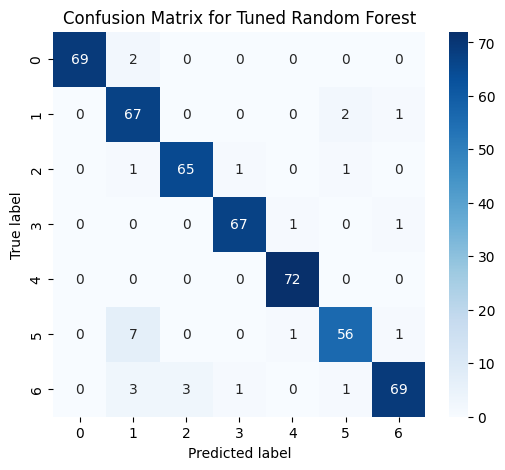

In [48]:
# Display the best parameters and score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy_best_rf = best_rf.score(X_test, y_test)
report_best_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)

# Display the performance of the tuned model
print(f"\nPerformance of Random Forest after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_rf}")
print(f"Precision: {report_best_rf['weighted avg']['precision']}")
print(f"Recall: {report_best_rf['weighted avg']['recall']}")
print(f"F1-Score: {report_best_rf['weighted avg']['f1-score']}")

# Confusion Matrix Plot for tuned model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt="d", cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix for Tuned Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
# Import joblib for saving and loading models
import joblib

# Save the best model (Random Forest as an example)
joblib.dump(best_rf, 'best_random_forest_model.joblib')

# Save other models (Logistic Regression and SVM if needed)
joblib.dump(best_logreg, 'best_logistic_regression_model.joblib')
joblib.dump(best_svm, 'best_svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model saved successfully.")


Model saved successfully.
